<a href="https://colab.research.google.com/github/Birang1/opensource.guide/blob/main/Colab_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 백 테스팅(이전 주가의 추이에 전략을 대입해보는 것)을 하려면 지난 몇년간의 주가가 필요함
!pip install yfinance pandas-datareader finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 라이브러리 가져오기 코드 스니펫
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

import numpy as np
import pandas as pd

import FinanceDataReader as fdr

df = fdr.DataReader('005930','2018') # 삼성전자의 종목코드, 2018년부터 지금까지 본다.

df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


<Axes: xlabel='Date'>

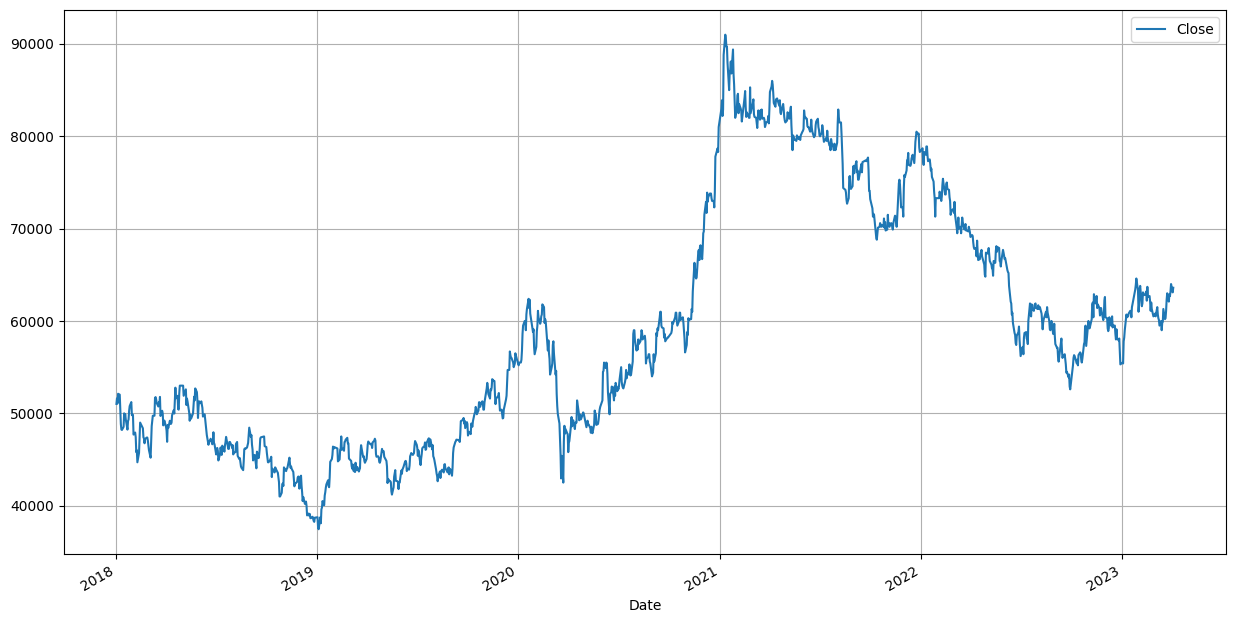

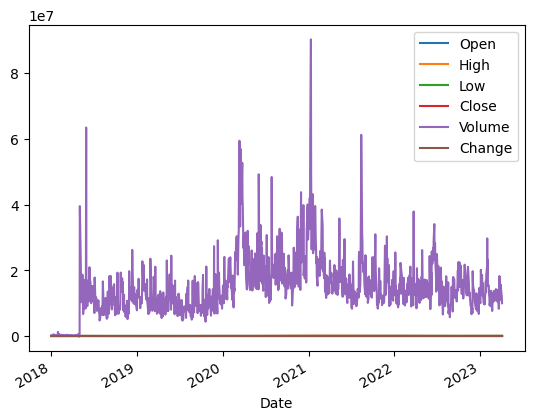

In [ ]:
df = fdr.DataReader('005930','2018') # 삼성전자의 종목코드, 2018년부터 지금까지 본다.

df.head()

df[df['Change'] > 0.05] # 상승 비율이 5% 넘는 날들

# 원하는 column만 뽑아 dataframe을 만들고 싶을 때는 df[['']] 로 진행하면 됨

# 그래프 그리기

df.plot(y=['Close'],figsize=[15,8],grid=True) # y = ['Open','Close'] > 이렇게 하면 두가지 그래프를 그릴 수 있음.
df.plot() # 이렇게 하면 모든 정보로 그래프를 그려줌.

<Axes: xlabel='Date'>

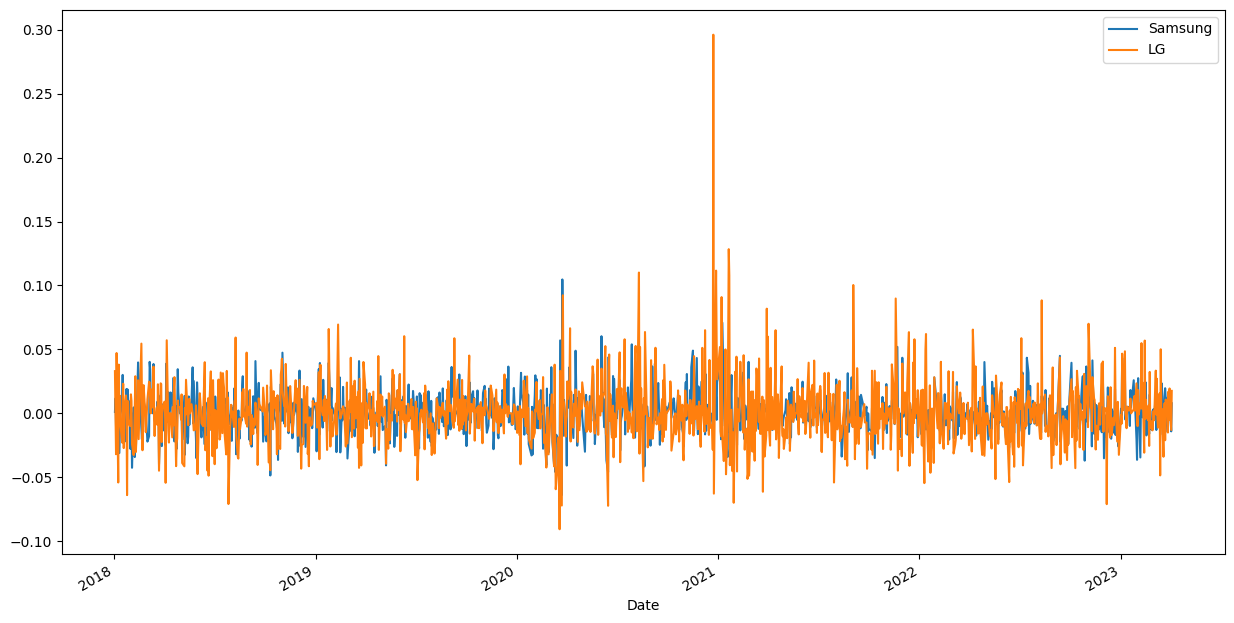

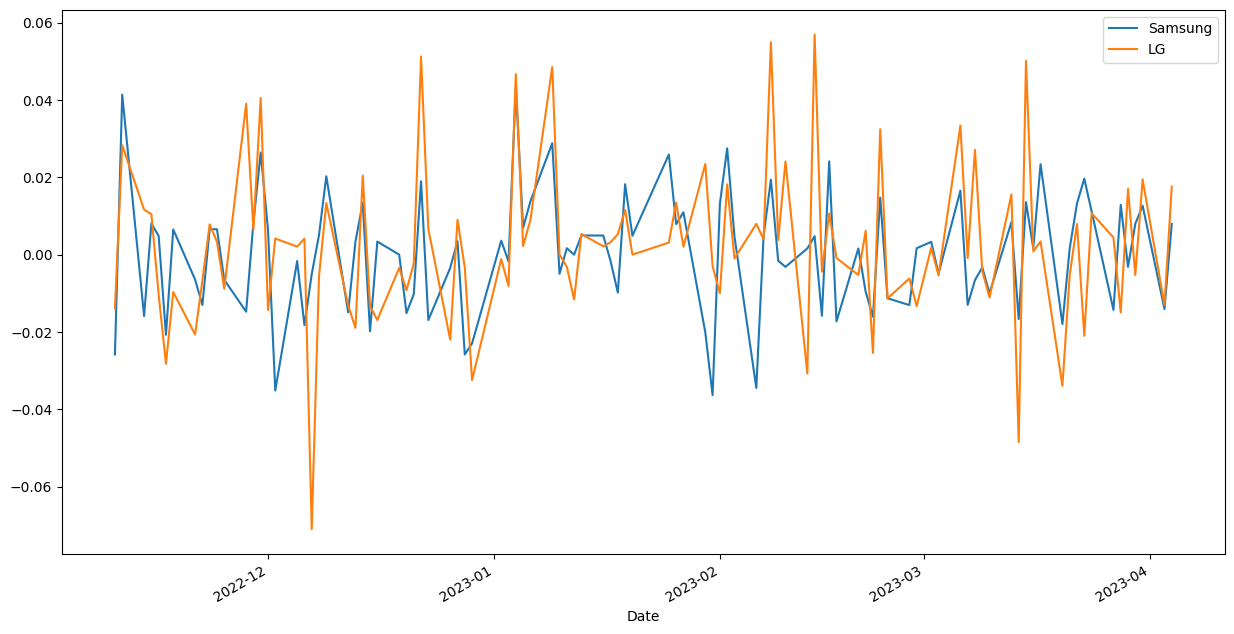

In [ ]:
df_1 = fdr.DataReader('005930','2018') # 삼성전자
df_2 = fdr.DataReader('066570','2018') # LG 전자


# df를 dataframe으로 만들건데
df = pd.DataFrame()

# df_1의 change라는 column을 가져와서 samsung이라는 항목으로 넣어주고
df['Samsung'] = df_1['Change']
# df_2의 change라는 column을 가져와서 LG라는 항목으로 넣어줘라.
df['LG'] = df_2['Change']

df

df.plot(figsize=[15,8]) # 이렇게 하면 보기가 어려우니

# 최근 100일만 보기 위해서는 .tail 함수를 사용

df.tail(100).plot(figsize=[15,8]) # Dataframe의 마지막 100개 정도를 plot으로 그린다.

In [ ]:
df = fdr.DataReader('005930','2018') # 삼성전자

df = df[['Close']]

# 이평선을 만들려면 평균을 내어서 이어가는 것이 필요

# .rolling(x).mean() : x개씩 묶어서 (.rolling()) 평균을 (.mean()) 내겠다.
# 대신 평균을 내는 원리는 (1,2,3) > 3에 작성, (2,3,4) > 4에 작성, (3,4,5) > 5에 작성 이런 순서대로 가는것임.

df.rolling(3).mean() 

# 이를 ma 라는 column으로 만들어서 close 옆에 붙힐것임.

# df['ma'] = df.rolling(3).mean() 

# 하지만 그날의 close와 전날 3일의 평균을 비교해야 함. 그런데 전날 3일의 평균은 오른쪽 위에 한칸 올라가 있기 때문에 한칸을 내려준 상태에서 작업해야 편함.
# .shift(#) 함수를 사용하면 됨.
df['ma'] = df.rolling(3).mean().shift(1) 

# Clos가 전날 3개의 평균보다 높으면 사고 아니면 팔아라 라는 함수를 사용. > np.where 함수와 cond를 사용
df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

df

In [ ]:
# 수익률 구하기
# 핵심 : buy에서 sell로 바뀔 때 : 파는것. / sell에서 buy로 바뀔 때 : 사는것.
# buy, buy, buy : 계속 사는것이 아니라 가지고 있는것.
# sell, sell, sell : 계속 파는것이 아니라 안가지고 있는것.

# buy만 먼저 차근히 해보기

# df['action_temp'] = df['action'].shift(1) # action column을 한칸 아래로 당겨 옆으로 붙히면 한줄 안에 전의 것과 비교 할 수 있을것임.

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')

df['real_buy'] = np.where(cond1,'buy','')

df

In [ ]:
# 수익률 구하기
# 핵심 : buy에서 sell로 바뀔 때 : 파는것. / sell에서 buy로 바뀔 때 : 사는것.
# buy, buy, buy : 계속 사는것이 아니라 가지고 있는것.
# sell, sell, sell : 계속 파는것이 아니라 안가지고 있는것.


# buy, sell 모두 통합.

# df['action_temp'] = df['action'].shift(1) # action column을 한칸 아래로 당겨 옆으로 붙히면 한줄 안에 전의 것과 비교 할 수 있을것임.

df.iloc[-1,-1] # 마지막은 무조건 팔아 놓은 상태여야함. 그래야 수익율을 측정 할 수 있음..

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

df['real_buy'] = np.where(cond1,'buy','')
df['real_sell'] = np.where(cond2,'sell','')

df_buy = df[cond1] # 실제로 모두 사야하는 시점.
df_sell = df[cond2] # 실제로 모두 팔아야하는 시점.



In [ ]:
# buy와 sell을 좌우로 붙히기

df_result = pd.concat([df_buy,df_sell],axis = 1) # ,axis = 1을 하면 가로로 붙음

df_result

# 실제 적용 원리 설명
# close는 그냘의 가격
# ma는 3일동안의 평균임.
# real buy에서 close 가격 만큼 샀다가
# 아래 줄의 real sell 에서 그 close 만큼 팔면 됨.

# 위의 df.result는 다 떨어져 있음.
# df_buy와 df_sell에서 NaN을 제거하고 옆으로 이어 붙히면 좋을것임.
# 그것을 해주는것이 .reset_indenx()

df_buy = df[cond1].reset_index()
df_buy.columns=['날짜','종가(buy)','이평값','액션','전날_액션','실제액션',''] # 보기 좋게 column 이름 바꾸기

df_sell = df[cond2].reset_index()
df_sell.columns=['날짜','종가(sell)','이평값','액션','전날_액션','','실제액션'] # 보기 좋게 column 이름 바꾸기

df_result = pd.concat([df_buy,df_sell],axis = 1)

df_result.head(30)

df_result['수익률'] = df_result['종가(sell)']/df_result['종가(buy)']

# 최종적으로 수익이 얼마나 생겼는지는? > 사고파는 행위의 수익률을 모두 다 곱하면 됨. > .cumprod 를 사용
df_result[['수익률']] # 문제가 생긴다면 df = ['Close'] 에다가 뒤에 .copy()를 해주면 됨. 그려면 전에것을 건드리지 않고 가지고 오게 됨.

df_result['수익률_cumprod'] = df_result[['수익률']].cumprod() # df_result[['']] 불러와야 하기 때문에, 대괄호 두개를 해줘야 하며, cumprod 뒤에는 () 소괄호를 꼭 붙혀줘야 함.

df_result[['수익률_cumprod']].iloc[-2,0] # .iloc[x행,y열] (x번째 행, x번째 열)

1.3435560190688793

In [21]:
# 회사 코드와 이평선의 평균수에 따라 달라질 수 있음.

def get_return(code, n):
  df = fdr.DataReader(code,'2018')

  df = df[['Close']].copy() # .copy를 적용하는 이유는 close라는 cloumn이 시간이 지나도변경이 되지 않게 하기 위하여 

  df['ma'] = df.rolling(n).mean().shift(1) 

  
  df['action'] = np.where(df['Close'] > df['ma'], 'buy', 'sell')

  df.iloc[-1,-1] 

  cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
  cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')
# 이렇게 까지하면 하나의 dataframe안에 4개의 column이 생김.
  df_buy = df[cond1].reset_index()
  df_buy.columns=['날짜','종가(buy)','이평값','액션'] # 보기 좋게 column 이름 바꾸기

  df_sell = df[cond2].reset_index()
  df_sell.columns=['날짜','종가(sell)','이평값','액션'] # 보기 좋게 column 이름 바꾸기

  df_result = pd.concat([df_buy,df_sell],axis = 1)

  df_result['수익률'] = df_result['종가(sell)']/df_result['종가(buy)']

  df_result['수익률_cumprod'] = df_result[['수익률']].cumprod() # df_result[['']] 불러와야 하기 때문에, 대괄호 두개를 해줘야 하며, cumprod 뒤에는 () 소괄호를 꼭 붙혀줘야 함.

  return df_result[['수익률_cumprod']].iloc[-2,0] -1 # .iloc[x행,y열] (x번째 행, x번째 열)


In [66]:
# 장, 단기 이평선 적용하기

df = fdr.DataReader('005930','2018')

df = df[['Close']].copy()

df['ma1'] = df['Close'].rolling(3).mean().shift(1) # 단기 이평선 : 지금 당장 이라고 생가하면 될 듯
df['ma2'] = df['Close'].rolling(30).mean().shift(1) # 장기 이평선 : 전체적인 평균이라고 생각하면 될 듯

# 따라서 지금 당장 df['ma1'] 평균 df['ma2']보다 비싸지기 시작하면 사야함.

df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

df.iloc[-1,-1] 

cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

# 위에 조건까지 달고 나면 column이 5개이기 때문에 column을 수정해줘야 함.
df_buy = df[cond1].reset_index()
df_buy.columns=['날짜','종가(buy)','이평값1','이평값2','액션'] # 보기 좋게 column 이름 바꾸기

df_sell = df[cond2].reset_index()
df_sell.columns=['날짜','종가(sell)','이평값1','이평값2','액션'] # 보기 좋게 column 이름 바꾸기

df_result = pd.concat([df_buy,df_sell],axis = 1)

df_result['수익률'] = df_result['종가(sell)']/df_result['종가(buy)']

# 수익률, 장기, 단기에 따른 표를 만들고 싶을 때.

# 원래는 .cumprod() 다음에 .tail(1) 이어야 하는데 마지막 값이 NaN으로 나와서 아래처럼 진행
df_final = (df_result[['수익률']].cumprod().iloc[[-2], :])*100 # .iloc[[n],:] n번째 있는 행의 정보를 가져오는 방법
df_final['단기'] = 3
df_final['장기'] = 30

df_final



,수익률,단기,장기
37,103.710271,3,30


In [76]:
# 장, 단기 이평선 적용하기

def get_return_sl(code,short,long):
  df = fdr.DataReader(code,'2018')

  df = df[['Close']].copy()

  df['ma1'] = df['Close'].rolling(short).mean().shift(1) # 단기 이평선 : 지금 당장 이라고 생가하면 될 듯
  df['ma2'] = df['Close'].rolling(long).mean().shift(1) # 장기 이평선 : 전체적인 평균이라고 생각하면 될 듯

  # 따라서 지금 당장 df['ma1'] 평균 df['ma2']보다 비싸지기 시작하면 사야함.

  df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

  df.iloc[-1,-1] 

  cond1 = (df['action'] == 'buy') & (df['action'].shift(1) == 'sell')
  cond2 = (df['action'] == 'sell') & (df['action'].shift(1) == 'buy')

  # 위에 조건까지 달고 나면 column이 5개이기 때문에 column을 수정해줘야 함.
  df_buy = df[cond1].reset_index()
  df_buy.columns=['날짜','종가(buy)','이평값1','이평값2','액션'] # 보기 좋게 column 이름 바꾸기

  df_sell = df[cond2].reset_index()
  df_sell.columns=['날짜','종가(sell)','이평값1','이평값2','액션'] # 보기 좋게 column 이름 바꾸기

  df_result = pd.concat([df_buy,df_sell],axis = 1)

  df_result['수익률'] = df_result['종가(sell)']/df_result['종가(buy)']

  # 수익률, 장기, 단기에 따른 표를 만들고 싶을 때.

  # 원래는 .cumprod() 다음에 .tail(1) 이어야 하는데 마지막 값이 NaN으로 나와서 아래처럼 진행
  df_final = (df_result[['수익률']].cumprod().iloc[[-2], :] -1)*100
  df_final['단기'] = short
  df_final['장기'] = long

  return df_final

In [79]:
get_return_sl('005930',3,30)

,수익률,단기,장기
37,3.710271,3,30


In [ ]:
# 한 종목에서 최적의 장기 및 단기 이평선 찾기

# 이중 반복문을 사용하기

for short in range(3,11): # 3부터 11전까지
  print (short)

for long in range(30, 61): # 30부터 60까지
  print (long)

# 이 두개를 합치면

for short in range(3,11): 
  for long in range(30, 61):
    print (short,long)
      df = get_return_sl('005930',short,long)

# df_result = pd.concat(dfs)

In [84]:
# 숙제 :  한 종목에 대해 최적의 단기/장기이평선을 구해보기

dfs = []
for short in range(3,11): 
  for long in range(30, 61):
    df = get_return_sl('005930',short,long)
    dfs.append(df)


df_result = pd.concat(dfs)

df_result.sort_values(by  = '수익률', ascending = False)

,수익률,단기,장기
13,46.972799,10,59
14,46.603698,10,58
13,44.141216,10,60
14,43.240196,10,57
13,40.461669,9,59
...,...,...,...
22,-15.515443,10,40
26,-17.208402,10,35
27,-17.383655,10,34
25,-17.610517,8,34
